In [1]:
#autoreload is an ipython extension that will automatically detect changes in the file you are working on
%load_ext autoreload
%autoreload 2

from lemipy import Survey, plot

In [2]:
# survey_data = 'survey_data.csv'
survey_data = None
remote = 'CC_01'
directory = 'Curnamona' # folder containing the time series data
channels = ['Bx','By','Ex','Ey']

survey = Survey(directory=directory, remote=remote, survey_data=survey_data, channels=channels)

In [3]:
print(survey)

Curnamona
----------------  ------------------------
Site Count        4
Lat Bounds        (-31.091888, -30.905135)
Lon Bounds        (140.00703, 141.290463)
First Deployment  2017-07-06 05:45:18
Last Pick Up      2017-07-27 03:18:53
Survey Duration   20 days 21:33:35
Lemi Boxes Used   [ 8 10 14]
----------------  ------------------------


In [4]:
print(survey.site_list)

['CC_01', 'CC_02', 'CC_10', 'CC_62']


In [5]:
survey.dataframe()
survey.dataframe().to_csv('curnamon_summary.csv')

In [6]:
site = survey.sites['CC_62']
print(site)

name                                CC_62
lemi_number                            14
latitude                         -30.9051
longitude                          141.29
altitude                              106
current                               106
battery_voltage                     12.93
deployment_time       2017-07-25 07:15:54
pickup_time           2017-07-27 03:18:53
deployment_length         1 day, 20:02:59
file_freq                 0 days 01:30:00
channels                 [Bx, By, Ex, Ey]
export_options                         {}
distance_to_remote                 124.31
dtype: object


In [7]:
from lemipy.filters import remove_50hz_odd, remove_50hz_even
from scipy.io.wavfile import write

In [8]:
site.export_options['filter'] = {
    'all': remove_50hz_odd(2)
}

filter = False
decimate = None
f_name = '0300'

In [9]:
for c in site.channels:
    write("{}{}.wav".format(site.name, c), site.sample_rate, site.in_memory.data[c])

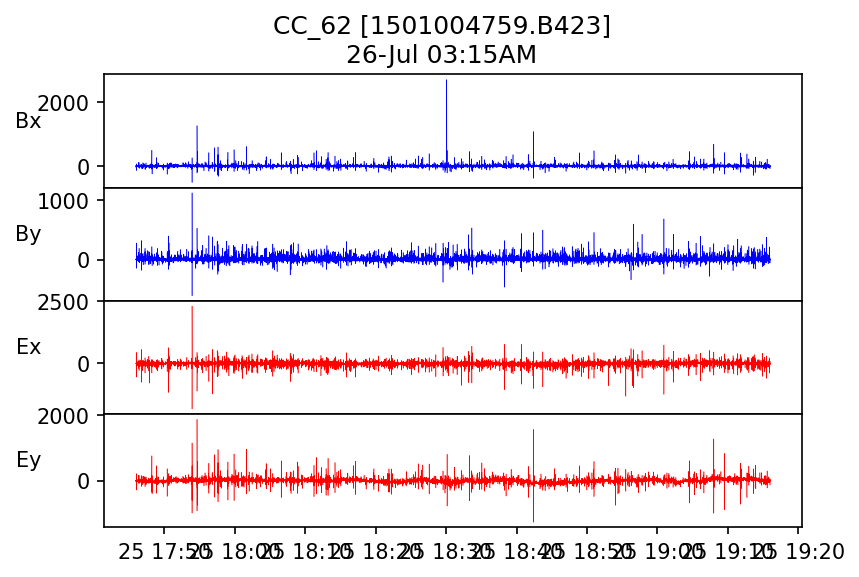

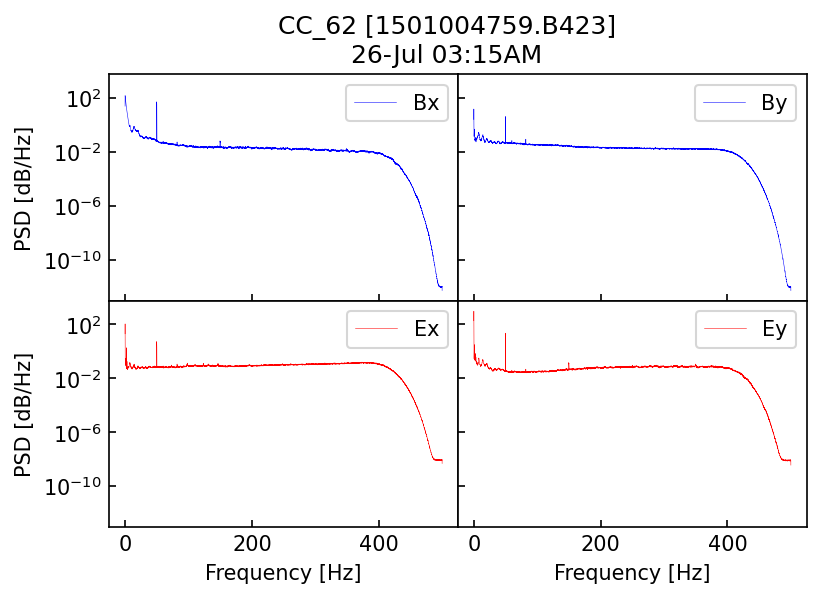

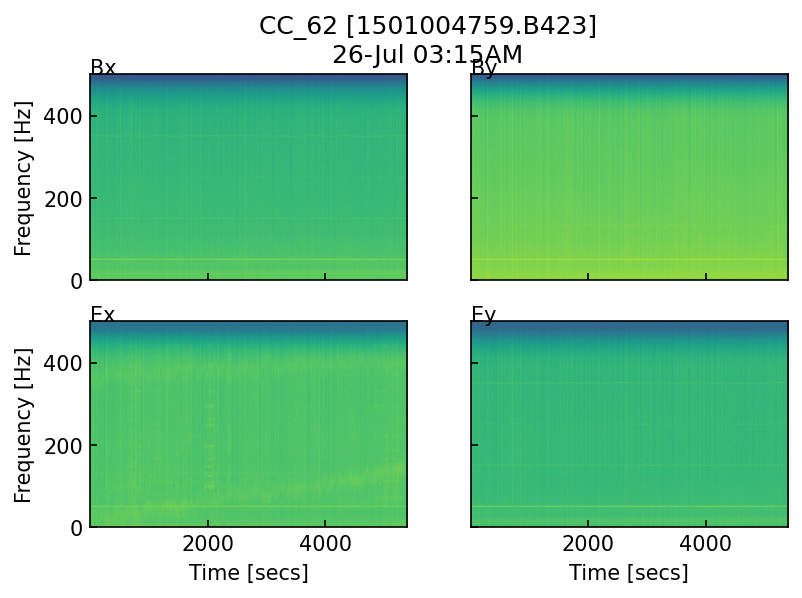

In [10]:
plot.time_series(site, file_name=f_name, filter=filter, decimate=decimate)
plot.welch(site, file_name=f_name, filter=filter, decimate=decimate)
plot.spectrogram(site, file_name=f_name, filter=filter, decimate=decimate)